In [1]:
%pylab inline
import numpy as np
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [71]:
data1 = []
data2 = []
i = 2
for j in range(1,6):
    data11 = pd.read_csv("upload/speedAyush"+str(i)+".csv")
    data21 = pd.read_csv("upload/speedWrik"+str(j)+".csv")
    data1.append(data11)
    data2.append(data21)

In [72]:
x = []
y = []
for k in range(0,5):
    x1 = data1[k].iloc[:,0]
    x2 = [i for i in x1]
    x3 = data1[k].iloc[:,1]
    x4 = [i for i in x3]
    y1 = data2[k].iloc[:,0]
    y2 = [i for i in y1]
    y3 = data2[k].iloc[:,1]
    y4 = [i for i in y3]
    x5 = []
    y5 = []
    for j in range(0,len(x2)):
        a = [x2[j],x4[j]]
        x5.append(a)
    for j in range(0,len(y2)):
        b = [y2[j],y4[j]]
        y5.append(b)
    x11 = np.array(x5)
    y11 = np.array(y5)
    x.append(x11)
    y.append(y11)

In [73]:
distance = []
path = []
for i in range(0,5):
    distance11,path11 = fastdtw(x[i], y[i], radius=2,  dist=euclidean)
    distance.append(distance11)
    path.append(path11)

In [74]:
euc = []
for j in range(0,5):
    e = []
    path11 = path[j]
    for i in path11:
        xSeries = x[j][i[0]]
        ySeries = y[j][i[1]]
        e.append(euclidean(xSeries, ySeries))
    euc.append(e)

In [75]:
maxi = 0
mini = 1000
for i in euc:
    if len(i) > maxi:
        maxi = len(i)
    if len(i) < mini:
        mini = len(i)
print(maxi)
print(mini)

54
53


In [76]:
for i in euc:
    if maxi-len(i) > 0:
        for j in range(0,maxi-len(i)):
            i.append(0)

In [77]:
euclid = np.array(euc)

In [78]:
outCheck = euclid.std(0)
print(outCheck)
print(len(outCheck))

[  0.           0.74202912   5.02401547   0.73968755   0.54586071
   0.38550877   0.40500443   0.3753451    0.51755815   0.29715003
   0.60480233   0.76203207   0.58621956   0.60091428   0.73293731
   0.96391496   0.42991744   0.56480633   3.65604385   0.89008574
   1.83672232   1.74799134   1.28911891   0.72478815   0.92714303
   0.60362867   0.70015227   0.34927342   0.62929469   0.42389183
   5.65871585  11.46423152  17.58238881  23.1813139   26.96370624
   9.62080233  21.69240628  28.10979249  27.72721405  28.87600661
  27.72570337  28.87234195  24.68742455  30.39894248  28.49991444
  29.260826    27.34608892  28.8756874   28.49256793  27.72761691
  28.49243426  28.11007299  29.64480936 195.07072824]
54


In [79]:
out = [ 0.,7.6222888,1.28909351,0.50313601,0.40823923,0.52276039,0.68409885,
       0.47100917,0.5943060,0.50712524,0.63647946,0.88343757,1.26877159,0.88593596,
       0.58420113,0.55849572,1.11861177,0.58354765,0.45349692,3.91306162,1.02630051,
       1.69594541,1.60207398,0.66616407,0.60337481,1.33028231,1.13255606,0.99607701,
       0.97148844,0.50141571,4.50667912,11.25857005,19.13872895,27.67476316,35.37868321,41.67506706]
print(out)
print(len(out))

[0.0, 7.6222888, 1.28909351, 0.50313601, 0.40823923, 0.52276039, 0.68409885, 0.47100917, 0.594306, 0.50712524, 0.63647946, 0.88343757, 1.26877159, 0.88593596, 0.58420113, 0.55849572, 1.11861177, 0.58354765, 0.45349692, 3.91306162, 1.02630051, 1.69594541, 1.60207398, 0.66616407, 0.60337481, 1.33028231, 1.13255606, 0.99607701, 0.97148844, 0.50141571, 4.50667912, 11.25857005, 19.13872895, 27.67476316, 35.37868321, 41.67506706]
36


In [80]:
if len(out) > len(outCheck):
    for i in range(0,len(out)-len(outCheck)):
        outcheck.append(0)
else:
    for i in range(0,len(outCheck)-len(out)):
        out.append(0)

In [32]:
a = np.correlate(out,outCheck,'same')

array([ 460.16948739,  489.52249138,  485.02338119,  481.08545666,
        512.25817765,  509.03419306,  514.17483393,  516.07322734,
        482.55370844,  588.56204702,  927.51100936, 1542.11707281,
       2446.41619599, 3632.35490512, 5035.54403077, 5003.42250805,
       4970.31060045, 4932.6928779 , 4875.58255122, 4763.69874927,
       4541.6301272 , 4170.12112156, 3607.04827166, 2811.0424001 ,
       2013.21891739, 1315.46808777,  750.54493922,  331.51180716,
        145.67561448,  164.16201294,  153.41550715,  152.23863927,
        135.02800441,  117.96292133,  142.73406224,  166.67972021,
        184.92456795,  203.82492904,  200.84011641,  105.66433132,
        106.0106142 ,  122.11766646,  101.78025381,  115.06521097])

In [45]:
b = np.correlate(out,outCheck,'same')

In [46]:
a = np.array([ 460.16948739,  489.52249138,  485.02338119,  481.08545666,
        512.25817765,  509.03419306,  514.17483393,  516.07322734,
        482.55370844,  588.56204702,  927.51100936, 1542.11707281,
       2446.41619599, 3632.35490512, 5035.54403077, 5003.42250805,
       4970.31060045, 4932.6928779 , 4875.58255122, 4763.69874927,
       4541.6301272 , 4170.12112156, 3607.04827166, 2811.0424001 ,
       2013.21891739, 1315.46808777,  750.54493922,  331.51180716,
        145.67561448,  164.16201294,  153.41550715,  152.23863927,
        135.02800441,  117.96292133,  142.73406224,  166.67972021,
        184.92456795,  203.82492904,  200.84011641,  105.66433132,
        106.0106142 ,  122.11766646,  101.78025381,  115.06521097])

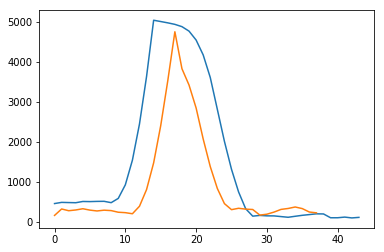

In [47]:
plot(a)
plot(b)

In [70]:
test1 = np.std(out)
test2 = np.std(outCheck)
print(test1)
print(test2)

9.89636358312841
6.628489433605633


In [81]:
test1 = np.std(out)
test2 = np.std(outCheck)
print(test1)
print(test2)

8.394181320145574
27.76525894094306
